# Exercício com nota:

## - Prever o risco de Diabete

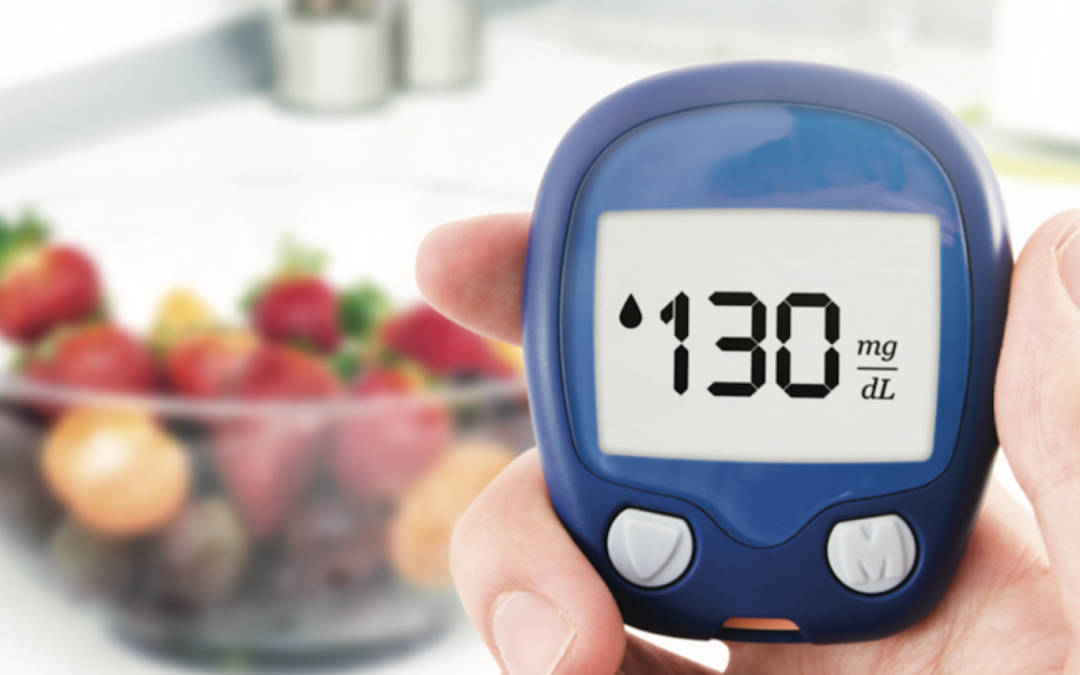

## O que significa diabete

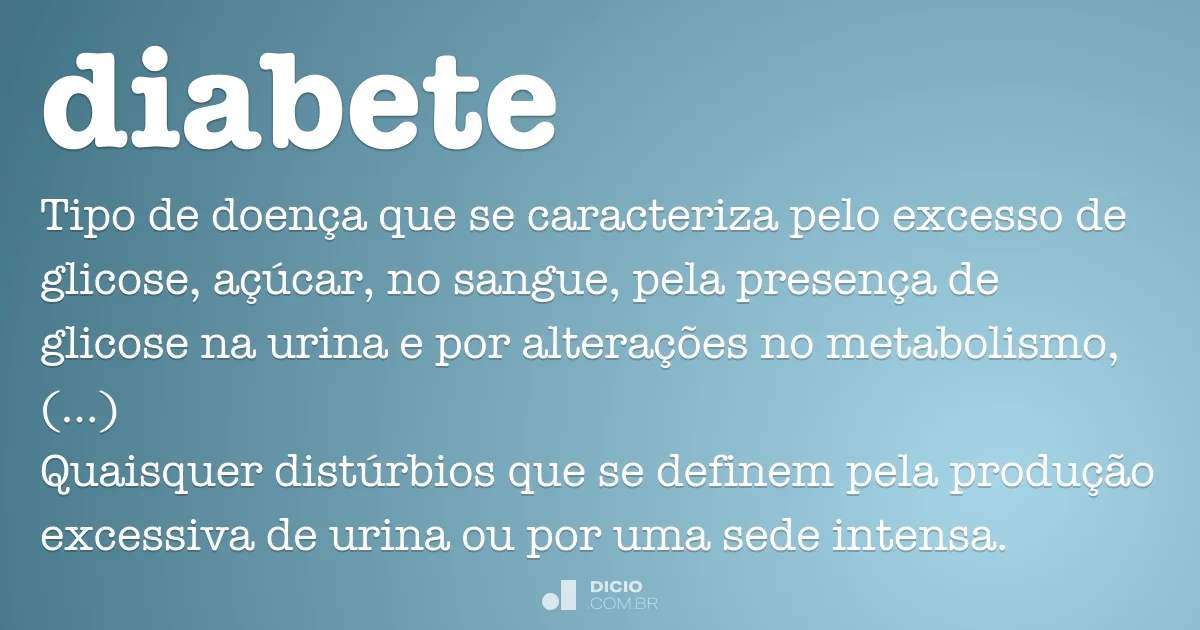

## Colunas do dataset

- gênero: refere-se ao sexo biológico do indivíduo, o que pode ter um impacto em sua suscetibilidade ao diabetes. Existem três categorias: masculino, feminino e outros.
- idade: um fator importante, já que o diabetes é mais comumente diagnosticado em adultos mais velhos. A faixa etária varia de 0 a 80 anos em nosso conjunto de dados.
- hipertensão: é uma condição médica na qual a pressão arterial nas artérias está persistentemente elevada. Tem valores 0 ou 1, onde 0 indica que eles não têm hipertensão e 1 significa que têm hipertensão.
doença cardíaca: a doença cardíaca é outra condição médica que está associada a um aumento do risco de desenvolvimento do diabetes. Tem valores 0 ou 1, onde 0 indica que eles não têm doença cardíaca e 1 significa que têm doença cardíaca.
- histórico de tabagismo: o histórico de tabagismo também é considerado um fator de risco para o diabetes e pode agravar as complicações associadas ao diabetes.
- IMC: o IMC (Índice de Massa Corporal) é uma medida da gordura corporal com base no peso e altura. Valores mais altos de IMC estão relacionados a um maior risco de diabetes. A faixa de IMC no conjunto de dados varia de 10,16 a 71,55. IMC abaixo de 18,5 é baixo peso, 18,5-24,9 é normal, 25-29,9 é sobrepeso e 30 ou mais é obeso.
- nível de HbA1c: o nível de HbA1c (hemoglobina A1c) é uma medida do nível médio de açúcar no sangue de uma pessoa nos últimos 2 a 3 meses. Níveis mais altos indicam um maior risco de desenvolvimento de diabetes. Na maioria das vezes, mais de 6,5% de nível de HbA1c indica diabetes.
- nível de glicose no sangue: o nível de glicose no sangue refere-se à quantidade de glicose na corrente sanguínea em um determinado momento. Níveis elevados de glicose no sangue são um indicador chave de diabetes.
- diabetes: o diabetes é a variável alvo a ser prevista, com valores 1 indicando a presença de diabetes e 0 indicando a ausência de diabetes.

# Visão geral do dataset

In [ ]:
import pandas as pd

df = pd.read_csv("diabetes_simple_small.csv")
df.head()

,gender,age,hypertension,heart_disease,smoking_history,bmi,HbA1c_level,blood_glucose_level,diabetes
0,Female,80.0,0,1,never,25.19,6.6,140,0
1,Female,54.0,0,0,No Info,27.32,6.6,80,0
2,Male,28.0,0,0,never,27.32,5.7,158,0
3,Female,36.0,0,0,current,23.45,5.0,155,0
4,Male,76.0,1,1,current,20.14,4.8,155,0


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20000 entries, 0 to 19999
Data columns (total 9 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   gender               20000 non-null  object 
 1   age                  20000 non-null  float64
 2   hypertension         20000 non-null  int64  
 3   heart_disease        20000 non-null  int64  
 4   smoking_history      20000 non-null  object 
 5   bmi                  20000 non-null  float64
 6   HbA1c_level          20000 non-null  float64
 7   blood_glucose_level  20000 non-null  int64  
 8   diabetes             20000 non-null  int64  
dtypes: float64(3), int64(4), object(2)
memory usage: 1.4+ MB


## Ordem do histórico de fumo

In [ ]:
#df.smoking_history.unique()
ordered_smoking_labels = ['No info', 'never', 'former', 'not current', 'current', 'ever']
print(ordered_smoking_labels)

['No info', 'never', 'former', 'not current', 'current', 'ever']


## Target
- Coluna: diabetes

In [ ]:
df.diabetes.value_counts()

0    18273
1     1727
Name: diabetes, dtype: int64

## Questões iniciais

a) Qual o tipo de cada coluna (nominal, ordinal ou numérico). Considere que numérico inclui intervalar e razão.


Resposta:

| nominais      | numérico            | ordinal         |
|---------------|---------------------|-----------------|
|         |                  |                 |
|         |                  |                 |
|         |                  |                 |
|         |                  |                  |

b) Mostre dois gráfico:
 -  Um apresentando a quantidade de cada tipo de fumante
 -  Outro a porcentagem de cada tipo de fumante

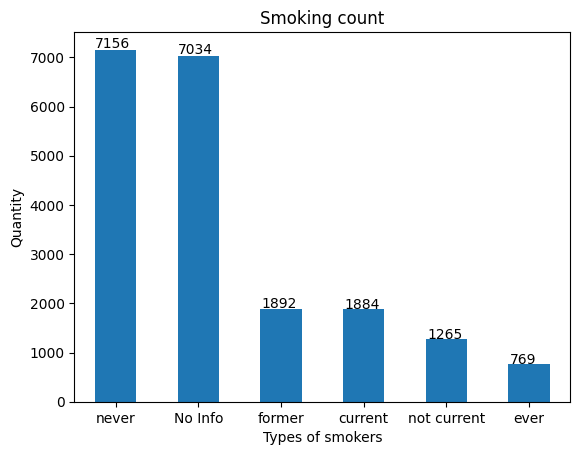

In [ ]:
import matplotlib.pyplot as plt

smoking_people = df['smoking_history'].value_counts(normalize=False)

ax = smoking_people.plot.bar(rot=0, title='Smoking count')

for pat in ax.patches:
  ax.annotate(str(pat.get_height()), (pat.get_x() * 1.005, pat.get_height() * 1.005))

plt.xlabel('Types of smokers')
plt.ylabel('Quantity')

plt.show()

# Questão principal:

## Assunto: Classificadores

## Crie um **classificador** baseado em **árvores de decisão** para prever se uma pessoa teria risco de diabetes ou não.
 - Soluções originais são um fator positivo
 - Utilize boas práticas (train/test, encoding, etc.)
 - Para o classificador você pode utilizar os hiperparâmetros: max_depth, min_samples_split, min_samples_leaf e random_state.
 - Outros hiperparâmetros podem ser utilizados se for necessário.
 - Defina uma ou mais medidas de desempenho apropriadas para o tipo de dado
 - [OPCIONAL] Mostre a árvore final
 - [DESEJÁVEL] Utilizar algum método de GridSearch nos hiperparâmetros


In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score
from sklearn.tree import plot_tree
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder
import numpy as np
import pandas as pd


##############################
# Decision Tree without GridSearch


##############################
#
#  Para visualizar sua árvore de decisão

#plt.figure(figsize=(10, 8))

#class_names = ["Low risk" if c == 0 else "At risk" for c in encoder.classes_]
#print(f'classes: {class_names}')
#plot_tree(clf, max_depth=depth, feature_names=X.columns, class_names=class_names, filled=True)
#plt.suptitle('Diabetes Decision Tree')
#plt.show()

In [ ]:
# grid search

from sklearn.model_selection import GridSearchCV
import numpy as np

clf = DecisionTreeClassifier(random_state=0)
# GridSearchCV?

In [ ]:
# decision tree with best parameters got from grid search
